### Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks
Code 참조: <a href="https://www.tensorflow.org/tutorials/generative/cyclegan?hl=ko">CycleGAN</a><br>
논문 참조: <a href="https://arxiv.org/pdf/1703.10593.pdf">Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks</a><br>

#### (1) Introduction
대부분의 Generate Paper와 마찬가지로 처음의 사진으로서 해당 Paper의 목적을 강력하게 나타내고 있다.  
<div><img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/Tensorflow/50.png" height="100%" width="100%" /></div><br>

위의 사진에서도 알 수 있듯이 **CycleGAN의 최종적인 목적은 서로 다른 도메인으로 변환을 하기 위해서 사용되는 것 이다. 즉, Image to Image Translation의 한 종류이다.**  

이러한 CycleGAN의 Abstract에서 해당 논문은 다음과 같이 설명하고 있다.  
>...
However, for many tasks, paired training data will not be available. We present an approach for learning to translate an image from a source domain X to a target domain Y in the absence of paired examples.  
...  
Because this mapping is highly under-constrained, we couple it with an inverse mapping F : Y → X and introduce a cycle consistency loss to enforce F(G(X)) ≈ X (and vice versa). 
>

위의 두 문장이 해당 논문 Abstract에서 가장 중요하다고 생각되는 부분이다.  
1) Image-to-Image Translation에서는 Paired-Image Set으로서 Training을 많이 진행한다.(ex) <a href="https://wjddyd66.github.io/tnesorflow2.0/Tensorflow2.0(1)/">Pix2Pix</a>)  
하지만 이러한 Paired-Dataset을 만드는 것은 현식적으로 많이 어렵기 때문에 **Unpaired Dataset으로서 Model을 구축하는 방법에 대해서 얘기한다.** Unpaired Dataset의 예시는 아래와 같다.  
<div><img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/Tensorflow/51.png" height="100%" width="100%" /></div><br>

2) Model을 구축하기 위한 방법으로서 **cycle consistency loss**을 사용하여 Model의 성능을 향상시킨다.  
X,Y를 예로들어서 GAN을 생각하면 다음과 같다.(G: Generator, D: Discriminator)  
- <span>$G(X) \rightarrow 1$</span>
- <span>$D(G(X)) \rightarrow 0 \text{  ,  }D(Y) \rightarrow 1$</span>

즉, Generator는 Discriminator가 실제 Data와 자신이 생성한 Data를 구분하지 못하게 학습시킨다.  
**해당논문에서는 이러한 GAN을 다음과 같이 설명하고 있다.**  
>The optimal G thereby translates the domain X to a domain Yˆ distributed identically to Y.  
However, such a translation does not guarantee that an individual input x and output y are paired up in a meaningful way – there are infinitely many mappings G that will induce the same distribution over yˆ. Moreover, in practice, we have found it difficult to optimize the adversarial objective in isolation: standard procedures often lead to the wellknown problem of mode collapse, where all input images map to the same output image and the optimization fails to make progress
>

단순한 Mapping으로 인하여 Label Domain처럼 보이게 만들면 되기 때문에 변하기 쉬운 Label만 만들게 될 것이고, 이러한 결과는 의미있는 결과라고 보기 힘들 것 이다.  

**따라서 해당 논문에서 주장하는 Cycle consistency loss**는 다음과 같다.  
>Mathematically, if we have a translator G : X → Y and another translator F : Y → X, then G and F should be inverses of each other, and both mappings should be bijections. We apply this structural assumption by training both the mapping G and F simultaneously, and adding a cycle consistency loss [64] that encourages F(G(x)) ≈ x and G(F(y)) ≈ y
>

**단순히 X를 Y Domain으로 이동시키는 것이 아니라 X -> Y -> X로서 Reconstruction을 한 뒤, Loss를 구하여 계산하겠다는 의미이다.**  
해당논문에서는 이러한 방법을 Cycle consistency loss라고 칭하였고 그림으로는 다음과 같이 나타내었다.  
<div><img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/Tensorflow/52.png" height="100%" width="100%" /></div><br>


#### (2) Formulation
기본적으로 CycleGAN도 GAN이기 때문에 <a href="https://wjddyd66.github.io/pytorch/Pytorch-GAN/">GAN</a>에서 사용한 Loss Function을 살펴보면 다음과 같다.  
<p>$$L_{GAN}(G,D_{Y},X,Y) = \mathbb{E}_{y\text{~}p_{data}(y)}[log D_{Y}(y)]+\mathbb{E}_{x\text{~}p_{data}(x)}[1-log D_{Y}(G(x))]$$</p>

위와 같이 서로 상반되는 Loss값을 더해주는 형식을 **Adversial Loss**라고 부르게 된다.  
위의 GAN은 이러한 Adversial Loss형식을 취하게 된다.  
<br>

**논문에서 설명하고 있는 CycleGAN을 위한 Cycle Consistency Loss부분만 살펴보면 다음과 같다.**  
<div><img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/Tensorflow/53.png" height="100%" width="100%" /></div><br>

위의 식을 위하여 앞으로 사용할 Parameter들을 다음과 같이 정의하고 같다.  
- <span>$\left\{ x_i \right\}_{i=1}^{N} \in X$</span>: Training Data
- <span>$\left\{ y_j \right\}_{j=1}^{M} \in Y$</span>: Target Data
- <span>$p_{data}(x)$</span>: Training Data Distribution
- <span>$p_{data}(y)$</span>: Target Data Distribution
- <span>$G: X -> Y$</span>: Training Data -> Target Data (Generator)
- <span>$F: Y -> X$</span>: Target Data -> Training Data (Generator)
- <span>$D_{Y}: D_{Y}(G(X))=0 \text{  ,  }D_{X}(Y)=1$</span>: Target Data(Y)는 1로서 판별, <span>$G(X)$</span>는 0으로서 판별 (Discriminator)
- <span>$D_{X}: D_{X}(F(Y))=0 \text{  ,  }D_{X}(X)=1$</span>: Training Data(X)는 1로서 판별, <span>$F(Y)$</span>는 0으로서 판별 (Discriminator)

위와 같이 Parameter들을 정의하게 되면 <span>$F(G(x)) \simeq x \text{  ,  }G(F(y)) \simeq y$</span>의 식이 성립하는 것을 알 수 있다.  

위와 같은 식일경우 **Cycle Consistency Loss**는 다음과 같이 정의된다.  
<p>$$L_{cyc}(G,F) = \mathbb{E}_{x\text{~}p_{data}(x)}[||F(G(x))-x||_{1}]+\mathbb{E}_{y\text{~}p_{data}(y)}[||G(F(y))-y||_{1}]$$</p>


**즉, 단순한 Mapping으로 인하여 Label Domain처럼 보이게 만들면 되기 때문에 변하기 쉬운 Label만 만들게 되는 것이 아닌 Reconstuction을 통하여 실제 Training, Target Data와의 L1 Loss로 인하여 좀 더 Target Data와 비슷한 Image가 생성된다고 예상할 수 있다.**  

최종적인 Loss Object는 다음과 같이 정의된다.  
<p>$$L(G,F,D_{X},D_{Y}) = L_{GAN}(G,D_{Y},X,Y) + L_{GAN}(F,D_{X},Y,X) + \lambda L_{cyc}(G,F)$$</p>
<p>$$G^{*},F^{*} =arg min_{G,F} max_{G_{X},D_{Y}} L(G,F,D_{X},D_{Y})$$</p>

#### (3) CycleGan vs Pix2Pix
<a href="https://wjddyd66.github.io/tnesorflow2.0/Tensorflow2.0(1)/">Pix2Pix</a>에서 Pix2Pix의 LossFunction을 살펴보면 다음과 같이 설명하였다.  

<p>$$L_{L1}(G) = \mathbb{E}_{x,y,z}[||y-G(x,z)||_1]$$</p>
<p>$$G^{*} = \text{arg } \underset{G}{min} \underset{D}{max} L_{cGAN}(G,D) + \lambda L_{L1}(G)$$</p>

**CNN L1 Loss Function(MSE) Model결과는 BlurFilter를 적용시킨 같은 결과로서 Image의 Low-Frequency를 학습하게 된다.**  
**CGAN Model결과는 Figh Frequency를 학습하게 된다.**  
따라서 Image의 Low Frequency와 High Frequency를 전부 학습하여 좀 더 Sharp하면서 Realistic한 Image의 결과를 얻을 수 있다.  
<br>

**Pix2Pix에서 CycleGAN이라는 새로운 기법에 대한 장점을 생각해보면 다음과 같다.(Pix2Pix -> CycleGAN순으로 같은 곳에서 발표하였다.)**  

Pix2Pix는 <span>$\lambda L_{L1}(G)$</span>이 Low-Frequency에 대한 학습하게 되므로 대부분의 Image는 Low-Frequency로서 **Loss Object는 L1 Loss에 많이 의지하게 된다. 따라서 High-Frequency를 담당하는 <span>$L_{cGAN}(G,D)$</span>의 역할을 매우 많이 상실된다.**  
<br>

반면 **CycleGAN의 식을 살펴보면 Pix2Pix와 마찬가지로 <span>$L_{cyc}(G,F)$</span>로서 Low-Frequency를 담당하는 부분이 존재하지만 이것은 전적으로 <span>$L_{GAN}(G,D_{Y},X,Y), L_{GAN}(F,D_{X},Y,X)$</span>로서 학습되는 G, F에 관련되어 있다. 즉, High-Frequency와 Low-Frequency를 둘 다 적절하게 조합을 잘 하는 Image-to-Image Translation Model이라고 생각할 수 있다.**  

추가적으로, Code의 결과를 확인하면 **GAN의 특성상 정확한 수치상으로 어떤 것이 더 좋은 Model이다 라고 할 수는 없지만, Paired-Dataset으로서 Training되는 Pix2Pix보다는 결과가 안좋다.** 라고 육안으로는 확인할 수 있다.

### CycleGAN 구현
CycleGAN을 구현하기 위해서 논문은 다음과 같이 Architecture를 구성하였다고 합니다.  
>Network Architecture We adopt the architecture for our generative networks from Johnson et al.  
[23] who have shown impressive results for neural style transfer and superresolution. This network contains two stride-2 convolutions, several residual blocks [18], and two fractionallystrided convolutions with stride 1/2.  
We use 6 blocks for 128 × 128 images and 9 blocks for 256 × 256 and higherresolution training images.  
Similar to Johnson et al. [23], we use instance normalization [53]. For the discriminator networks we use 70 × 70 PatchGANs [22, 30, 29], which aim to classify whether 70 × 70 overlapping image patches
are real or fake.  
Such a patch-level discriminator architecture has fewer parameters than a full-image discriminator and can work on arbitrarily-sized images in a fully convolutional fashion [22].  

하지만 현재 Tensorflow 2.0 Turtorial에서는 이전 Post <a href="https://wjddyd66.github.io/tnesorflow2.0/Tensorflow2.0(1)/#lossfunction">Pix2Pix</a>의 U-Net Network구조로서 해당 CycleGAN을 구현합니다.  
따라서 Pix2Pix의 Model을 먼저 Download받고 시작하여야 합니다.  
<code>!pip install -q git+https://github.com/tensorflow/examples.git</code>

<br>


#### Set up the input pipeline
필요한 Library를 불러오고 몇몇 설정을 지정한다.  
- mpl: Matplotlib의 설정 지정
- <code>tfds.disable_progress_bar()</code>: Dataset을 불러오는 경우 상태를 나타내지 않는다.
- <code>tf.data.experimental.AUTOTUNE</code>: Network가 스스로 설정하고 Dataset을 잘 불로올 수 있게 결정해라 Autotune에 대해서 궁금하시 분은 링크 참조. <a href="https://wjddyd66.github.io/tnesorflow2.0/Tensorflow2.0(4)/#autotune">Autotune</a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow_examples.models.pix2pix import pix2pix
import tensorflow_datasets as tfds
import tensorflow as tf

from IPython.display import clear_output
import matplotlib.pyplot as plt
import matplotlib as mpl

import time
import os

# 앞으로 사용할 Matplotlib의 Default Option을 설정한다.
mpl.rcParams['figure.figsize'] = (10, 10)
mpl.rcParams['axes.grid'] = False

# tfds로서 Data를 가져오는 경우 상태를 보이지 않게 설정한다.
tfds.disable_progress_bar()

# Dataset을 잘 가져올 수 있도록 Network가 스스로 설정하게 한다.
AUTOTUNE = tf.data.experimental.AUTOTUNE

#### Input Pipeline
Model에 넣기 위한 Preprocessing 과정이다. 각각의 Function은 다음과 같은 의미를 가지고 있다.  
- random_crop(): Image를 사용자가 지정한 Hyperparameter의 Size로서 Random하게 자른다.
- normalize(): Image의 값을 0 ~ 255 -> -1 ~ 1로서 Normalization한다.
- random_jitter(): Image Size (286,286)로서 지정 -> random_crop() 적용 -> 일정확률로 좌우 반전을 시킨다.
- preprocess_image_train(): Train Image를 전처리 과정을 실시한다. random_jitter() -> Normalization
- preprocess_image_test(): Test Image를 전처리 과정을 실시한다. Normalization

위와같은 Function을 활용하여  
```python
train_horses = train_horses.map(
    preprocess_image_train, num_parallel_calls=AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(1)
```
<br>
와 같이 Batch Size가 1이고 Shuffle한 Dataset을 만든다.

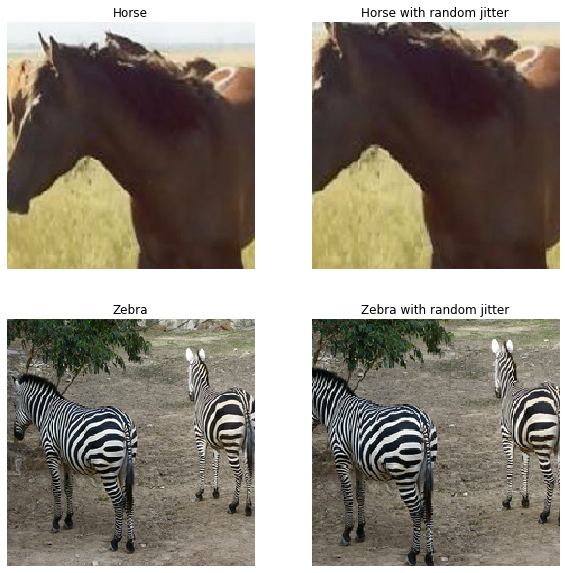

In [2]:
# Model에 적용할 Dataset을 Download받고, Train(Horse, Zebra), Test(Horse, Zebra)로서 분할한다.
dataset, metadata = tfds.load('cycle_gan/horse2zebra',
                              with_info=True, as_supervised=True)

train_horses, train_zebras = dataset['trainA'], dataset['trainB']
test_horses, test_zebras = dataset['testA'], dataset['testB']

# 사용할 Hyperparameter를 지정한다.
BUFFER_SIZE = 1000
BATCH_SIZE = 1
IMG_WIDTH = 256
IMG_HEIGHT = 256

# Image를 사용자가 지정한 Hyperparameter의 Size로서 Random하게 자른다.
def random_crop(image):
    cropped_image = tf.image.random_crop(
        image, size=[IMG_HEIGHT, IMG_WIDTH, 3])

    return cropped_image

# Image의 값을 0 ~ 255 -> -1 ~ 1로서 Normalization한다.
def normalize(image):
    image = tf.cast(image, tf.float32)
    image = (image / 127.5) - 1
    return image

# Image Size (286,286)로서 지정 -> random_crop() 적용 -> 일정확률로 좌우 반전을 시킨다
def random_jitter(image):
    # resizing to 286 x 286 x 3
    image = tf.image.resize(image, [286, 286],
                            method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

    # randomly cropping to 256 x 256 x 3
    image = random_crop(image)

    # random mirroring(좌우 반전)
    image = tf.image.random_flip_left_right(image)

    return image

# Train Image를 전처리 과정을 실시한다. random_jitter() -> Normalization
def preprocess_image_train(image, label):
    image = random_jitter(image)
    image = normalize(image)
    return image

# Test Image를 전처리 과정을 실시한다. Normalization
def preprocess_image_test(image, label):
    image = normalize(image)
    return image

# 위에서 정의한 Function을 활용하여 Dataset 생성
train_horses = train_horses.map(
    preprocess_image_train, num_parallel_calls=AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(1)

train_zebras = train_zebras.map(
    preprocess_image_train, num_parallel_calls=AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(1)

test_horses = test_horses.map(
    preprocess_image_test, num_parallel_calls=AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(1)

test_zebras = test_zebras.map(
    preprocess_image_test, num_parallel_calls=AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(1)

# Model에 넣을 Dataset을 생성한다. 1개씩 가졍오게 된다.
sample_horse = next(iter(train_horses))
sample_zebra = next(iter(train_zebras))

# DataPreprocess의 결과와 Mirroring을 Visualization한다. 
plt.subplot(221)
plt.title('Horse')
plt.axis('off')
plt.imshow(sample_horse[0] * 0.5 + 0.5)

plt.subplot(222)
plt.title('Horse with random jitter')
plt.axis('off')
plt.imshow(random_jitter(sample_horse[0]) * 0.5 + 0.5)

plt.subplot(223)
plt.title('Zebra')
plt.axis('off')
plt.imshow(sample_zebra[0] * 0.5 + 0.5)

plt.subplot(224)
plt.title('Zebra with random jitter')
plt.axis('off')
plt.imshow(random_jitter(sample_zebra[0]) * 0.5 + 0.5)

#### Import and reuse the Pix2Pix models
Pix2Pix를 활용하여 2개의 Generator와 Discriminator를 생성한다.  
위의 논문 설명에서 언급한 Parameter들을 Code에 Mapping하면 다음과 같다.  
위의 식을 위하여 앞으로 사용할 Parameter들을 다음과 같이 정의하고 같다.  

- <span>$G: X -> Y$</span>: Training Data -> Target Data (Generator) = <code>generator_g</code>
- <span>$F: Y -> X$</span>: Target Data -> Training Data (Generator) = <code>generator_f</code>
- <span>$D_{X}: D_{X}(F(Y))=0 \text{  ,  }D_{X}(X)=1$</span>: Training Data(X)는 1로서 판별, <span>$F(Y)$</span>는 0으로서 판별 (Discriminator) = <code>discriminator_x</code>
- <span>$D_{Y}: D_{Y}(G(X))=0 \text{  ,  }D_{Y}(Y)=1$</span>: Target Data(Y)는 1로서 판별, <span>$G(X)$</span>는 0으로서 판별 (Discriminator) = <code>discriminator_y</code>

**하나 중요하게 집고 넘어가야 되는 것은 Pix2Pix는 Discriminator에 input + target으로서 CGAN으로서 구성하였는데 이번 CycleGAN에서는 <code>pix2pix.discriminator(norm_type='instancenorm', target=False)</code>에서 target=False Option을 주어서 GAN을 사용한다.**  


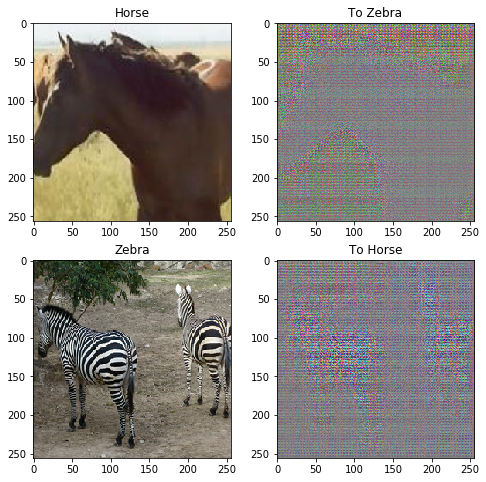

In [3]:
# Color Image Output을 뽑아내기 위한 Channel = 3
OUTPUT_CHANNELS = 3

# G,F 생성
generator_g = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')
generator_f = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')

# D_x, D_y 생성
discriminator_x = pix2pix.discriminator(norm_type='instancenorm', target=False)
discriminator_y = pix2pix.discriminator(norm_type='instancenorm', target=False)

# Generater가 잘 작동하는지 Visualization하기 위한 Sample
# F(G(x)) ≈ x
to_zebra = generator_g(sample_horse)
# G(F(y)) ≈ y
to_horse = generator_f(sample_zebra)
plt.figure(figsize=(8, 8))
contrast = 8

# Generator Visualization
imgs = [sample_horse, to_zebra, sample_zebra, to_horse]
title = ['Horse', 'To Zebra', 'Zebra', 'To Horse']

for i in range(len(imgs)):
    plt.subplot(2, 2, i+1)
    plt.title(title[i])
    # sample_horse, sample_zebra는 [-1,1]로 Normalization되었기 때문에
    # [0,1]로서 값을 바꾸는 과정이다.
    plt.imshow(imgs[i][0] * 0.5 + 0.5)
    
plt.show()

단순한 Discriminator를 Visualization한 것이다.  
Discriminator의 최종적인 Size는 (Batch, 30, 30, 1)이므로 30 * 30으로서 결과를 Visualization되었다는 정도만 알아도 된다.

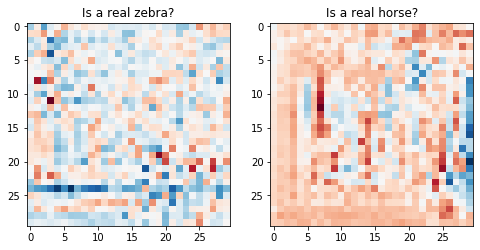

In [4]:
plt.figure(figsize=(8, 8))

plt.subplot(121)
plt.title('Is a real zebra?')
plt.imshow(discriminator_y(sample_zebra)[0, ..., -1], cmap='RdBu_r')

plt.subplot(122)
plt.title('Is a real horse?')
plt.imshow(discriminator_x(sample_horse)[0, ..., -1], cmap='RdBu_r')

plt.show()

#### Loss functions
**먼저 생각하고 가야되는 점은 현재 Model을 Pix2Pix를 사용한다는 것 이다.**  
따라서 논문에서 제공하는 LossFunction이 아닌 해당 Model에 맞는 LossFunction을 새롭게 구성해야 한다는 것 이다.  
먼저 GAN, CGAN, Pix2Pix, CycleGAN의 LossFunction을 살펴보면 다음과 같다.  
**GAN**  
<p>$$L_{GAN}(G,D_{Y},X,Y) = \mathbb{E}_{y\text{~}p_{data}(y)}[log D_{Y}(y)]+\mathbb{E}_{x\text{~}p_{data}(x)}[1-log D_{Y}(G(x))]$$</p>

**CGAN**  
<p>$$L_{CGAN}(G,D_{Y},X,Y) = \mathbb{E}_{y\text{~}p_{data}(y)}[log D_{Y}(y,z)]+\mathbb{E}_{x\text{~}p_{data}(x)}[1-log D_{Y}(G(x,z),z)]$$</p>

**Pix2Pix**  
<p>$$L_{L1}(G) = \mathbb{E}_{x,y,z}[||y-G(x,z)||_1]$$</p>
<p>$$G^{*} = \text{arg } \underset{G}{min} \underset{D}{max} L_{cGAN}(G,D) + \lambda L_{L1}(G)$$</p>

**CycleGAN**  
<p>$$L_{cyc}(G,F) = \mathbb{E}_{x\text{~}p_{data}(x)}[||F(G(x))-x||_{1}]+\mathbb{E}_{y\text{~}p_{data}(y)}[||G(F(y))-y||_{1}]$$</p>
<p>$$L(G,F,D_{X},D_{Y}) = L_{GAN}(G,D_{Y},X,Y) + L_{GAN}(F,D_{X},Y,X) + \lambda L_{cyc}(G,F)$$</p>
<p>$$G^{*},F^{*} =arg \underset{G,F}{min} \underset{G_{X},D_{Y}}{max} L(G,F,D_{X},D_{Y})$$</p>

즉, 기본적인 CycleGAN을 사용하되, Pix2Pix의 <span>$L_{L1}(G)$</span>또한 생각해야 한다는 것 이다.  

따라서 최종적인 Loss Object는 다음과 같이 구성된다.  
<p>$$L(G,F,D_{X},D_{Y}) = L_{GAN}(G,D_{Y},X,Y) + L_{GAN}(F,D_{X},Y,X) +$$</p> 
<p>$$\lambda_{1} L_{cyc}(G,F) + \lambda_{2}L_{L1}(G)+ \lambda_{2}L_{L1}(F)$$</p>
<p>$$G^{*},F^{*} =arg \underset{G,F}{min} \underset{G_{X},D_{Y}}{max} L(G,F,D_{X},D_{Y})+ \lambda_{2}L_{L1}(G)+ \lambda_{2}L_{L1}(F)$$</p>


위의 식에서 <span>$G^{*}$</span>와 <span>$F^{*}$</span>는 구성이 똑같으므로 <span>$G^{*}$</span>에대해서만 알아보자면 다음과 같다.  

**<span>$G^{*}$</span> Loss Function**  
<p>$$G^{*} = arg \underset{G}{min} \underset{D_{Y}}{max} L(G,F,D_{X},D_{Y})+ \lambda_{2}L_{L1}(G)+ \lambda_{2}L_{L1}(F)$$</p>
<p>$$= arg \underset{G}{min} \underset{D_{Y}}{max} L_{GAN}(G,D_{Y},X,Y)+ \lambda_{1}L_{cyc}(G)+ \lambda_{2}L_{L1}(G)$$</p>

**Generator**  
위의 식에서 Generator의 관련된 식을 정리하면 다음과 같다.  
<p>$$Loss_{G^{*} \text{  } Generator} = \underset{G}{max} \mathbb{E}_{x\text{~}p_{data}(x)}[log D_{Y}(G(x))] + \lambda_{1}L_{cyc}(G)+ \lambda_{2}L_{L1}(G)$$</p>
(많은 부분을 생략하였습니다. 이해되지 않으시는 분들은 <a href="https://wjddyd66.github.io/tnesorflow2.0/Tensorflow2.0(1)/#generator-loss">Pix2Pix-GeneratorLoss</a>를 참조하시면 되겠습니다.)  

**Discriminator**  
Discriminator의 관련된 식을 정리하면 다음과 같다.  
<p>$$Loss_{G^{*} \text{  } Discriminator} = \underset{D_{Y}}{max} \mathbb{E}_{y\text{~}p_{data}(y)}[log D_{Y}(y)]+\mathbb{E}_{x\text{~}p_{data}(x)}[1-log D_{Y}(G(x))]$$</p>

아래 Code에서 각각의 Loss Function은 다음과 같습니다.  

**discriminator_loss(real, generated)**
- real: 실제 Label Data Y
- generated: Generator에서 생성한 Data <span>$G(x)$</span>
- real_loss: 실제 Label을 1로서 판단한다. <span>$[log D_{Y}(y)]$</span>
- generated_loss: G(x)를 0로서 판단한다. <span>$\mathbb{E}_{x\text{~}p_{data}(x)}[1-log D_{Y}(G(x))]$</span>



In [ ]:
LAMBDA = 10
loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real, generated):
    real_loss = loss_obj(tf.ones_like(real), real)

    generated_loss = loss_obj(tf.zeros_like(generated), generated)

    total_disc_loss = real_loss + generated_loss

    return total_disc_loss * 0.5

**generator_loss(generated)**
- generated: Generator에서 생성한 Data <span>$G(x)$</span>
- loss_obj(tf.ones_like(generated), generated): G(x)를 1로서 판단하게 한다. <span>$\mathbb{E}_{x\text{~}p_{data}(x)}[log D_{Y}(G(x))]$</span>



In [5]:
def generator_loss(generated):
    return loss_obj(tf.ones_like(generated), generated)

**calc_cycle_loss(real_image, cycled_image)**  
- real_image: 실제 원본 Image
- cycled_image: Reconsturcted Image <span>$𝐹(𝐺(𝑥))$</span>
- tf.reduce_mean(tf.abs(real_image - cycled_image)): <span>$||F(G(x))-x||_{1}$</span>


In [6]:
def calc_cycle_loss(real_image, cycled_image):
    loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image))
  
    return LAMBDA * loss1

**identity_loss(real_image, same_image)**  
- real_image: 실제 원본 Image
- same_image: Generate Image <span>$G(𝑥)$</span>
- tf.reduce_mean(tf.abs(real_image - same_image)): <span>$||G(x)-y||_{1}$</span>


In [7]:
def identity_loss(real_image, same_image):
    loss = tf.reduce_mean(tf.abs(real_image - same_image))
    return LAMBDA * 0.5 * loss

#### Define Optimizer
각각의 Generator 2개, Discriminator2개 총 4개이므로 Optimizer를 4개 정의한다.

In [8]:
generator_g_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
generator_f_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

discriminator_x_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_y_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

#### CheckPoints
Model의 중간과정을 저장하기 위한 CheckPoints를 저장한다.  
자세한 사용법은 링크를 참조하자. <a href="https://www.tensorflow.org/guide/checkpoint">Checkpoint 사용법</a>

In [9]:
checkpoint_path = "./checkpoints/train"

ckpt = tf.train.Checkpoint(generator_g=generator_g,
                           generator_f=generator_f,
                           discriminator_x=discriminator_x,
                           discriminator_y=discriminator_y,
                           generator_g_optimizer=generator_g_optimizer,
                           generator_f_optimizer=generator_f_optimizer,
                           discriminator_x_optimizer=discriminator_x_optimizer,
                           discriminator_y_optimizer=discriminator_y_optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print ('Latest checkpoint restored!!')

#### Generate_image()
Training과정에서 Image가 어떻게 변화되는지 확인하기 위하여 선언한 Function이다.  
하나의 Image(X: Horse)를 입력받아, Generator(<span>$G: X -> Y$</span>)의 결과(Y: Zebra)를 통하여 어떻게 Generator되고 있는지 보여준다.

In [10]:
EPOCHS = 40
def generate_images(model, test_input):
    prediction = model(test_input)
    
    plt.figure(figsize=(12, 12))

    display_list = [test_input[0], prediction[0]]
    title = ['Input Image', 'Predicted Image']

    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.title(title[i])
        # getting the pixel values between [0, 1] to plot it.
        plt.imshow(display_list[i] * 0.5 + 0.5)
        plt.axis('off')
    plt.show()

#### Trainstep
실제 Model의 Weight가 update되는 부분을 지정한다.  
각각의 Loss Function은 위에서 정했으므로 각각의 Parameter가 어떤것을 의미하는지 파악하면 쉽게 대입하여 결과를 확인할 수 있다.
- real_x(<span>$x$</span>): 실제 Training Image(Horse)
- real_y(<span>$y$</span>): 실제 Label Image(Zebra)
- fake_y(<span>$G(x)$</span>): Generate Image
- fake_x(<span>$F(y)$</span>): Generate Image
- cycled_x(<span>$F(G(x))$</span>): Reconstruction Image(≃Horse)
- cycled_y(<span>$G(F(y))$</span>): Reconstruction Image(≃Zebra)
- same_x(<span>$G(x)$</span>): Generate Image
- same_y(<span>$F(y)$</span>): Generate Image

**하나 주의해야 하는 Code는 다음과 같다. <code>total_gen_g_loss = gen_g_loss + total_cycle_loss + identity_loss(real_y, same_y)</code>**  
위에서 Generator LossFunction을 설정할 때 다음과 같이 설정하였다.  
<p>$$Loss_{G^{*} \text{  } Generator} = \underset{G}{max} \mathbb{E}_{x\text{~}p_{data}(x)}[log D_{Y}(G(x))] + \lambda_{1}L_{cyc}(G)+ \lambda_{2}L_{L1}(G)$$</p>
따라서 Generator는 해당되는 3개의 LossFunction의 값의 합이라는 것을 기억해야 한다.

**참조**  
@tf.tufnction이나 tf.GradientTape()에 대해서 모르시는 분들은 반드시 알아야 하므로 참조 링크를 남겨둡니다. TF2.0에서는 기본적으로 이러한 방식으로 Weight를 Update합니다.
- <a href="https://wjddyd66.github.io/tnesorflow2.0/Tensorflow2.0(6)/#eager-execution">EagerExecution</a>
- <a href="https://wjddyd66.github.io/tnesorflow2.0/Tensorflow2.0(10)/">tf.function</a>



In [11]:
@tf.function
def train_step(real_x, real_y):
    # persistent is set to True because the tape is used more than
    # once to calculate the gradients.
    with tf.GradientTape(persistent=True) as tape:
        # Generator G translates X -> Y
        # Generator F translates Y -> X.
    
        fake_y = generator_g(real_x, training=True)
        cycled_x = generator_f(fake_y, training=True)

        fake_x = generator_f(real_y, training=True)
        cycled_y = generator_g(fake_x, training=True)

        # same_x and same_y are used for identity loss.
        same_x = generator_f(real_x, training=True)
        same_y = generator_g(real_y, training=True)

        disc_real_x = discriminator_x(real_x, training=True)
        disc_real_y = discriminator_y(real_y, training=True)

        disc_fake_x = discriminator_x(fake_x, training=True)
        disc_fake_y = discriminator_y(fake_y, training=True)

        # calculate the loss
        gen_g_loss = generator_loss(disc_fake_y)
        gen_f_loss = generator_loss(disc_fake_x)
    
        total_cycle_loss = calc_cycle_loss(real_x, cycled_x) + calc_cycle_loss(real_y, cycled_y)
    
        # Total generator loss = adversarial loss + cycle loss
        total_gen_g_loss = gen_g_loss + total_cycle_loss + identity_loss(real_y, same_y)
        total_gen_f_loss = gen_f_loss + total_cycle_loss + identity_loss(real_x, same_x)

        disc_x_loss = discriminator_loss(disc_real_x, disc_fake_x)
        disc_y_loss = discriminator_loss(disc_real_y, disc_fake_y)
  
    # Calculate the gradients for generator and discriminator
    generator_g_gradients = tape.gradient(total_gen_g_loss, 
                                        generator_g.trainable_variables)
    generator_f_gradients = tape.gradient(total_gen_f_loss, 
                                        generator_f.trainable_variables)
  
    discriminator_x_gradients = tape.gradient(disc_x_loss, 
                                            discriminator_x.trainable_variables)
    discriminator_y_gradients = tape.gradient(disc_y_loss, 
                                            discriminator_y.trainable_variables)
  
    # Apply the gradients to the optimizer
    generator_g_optimizer.apply_gradients(zip(generator_g_gradients, 
                                            generator_g.trainable_variables))

    generator_f_optimizer.apply_gradients(zip(generator_f_gradients, 
                                            generator_f.trainable_variables))
  
    discriminator_x_optimizer.apply_gradients(zip(discriminator_x_gradients,
                                                discriminator_x.trainable_variables))
  
    discriminator_y_optimizer.apply_gradients(zip(discriminator_y_gradients,
                                                discriminator_y.trainable_variables))

#### Training
지정한 Epoch수만큼 Training을 실시하면서 Generator(<span>$G: X -> Y$<span>)의 결과를 확인한다.

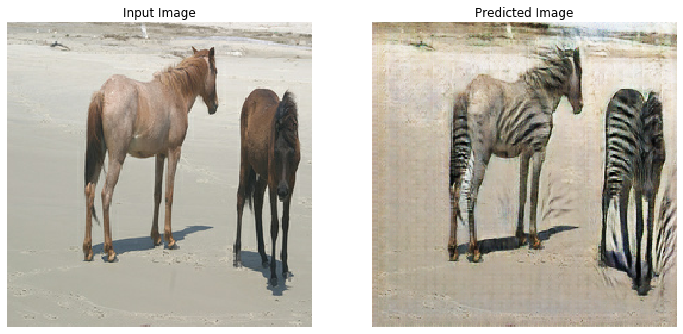

Saving checkpoint for epoch 40 at ./checkpoints/train/ckpt-8
Time taken for epoch 40 is 1098.5472128391266 sec



In [12]:
for epoch in range(EPOCHS):
    start = time.time()

    n = 0
    for image_x, image_y in tf.data.Dataset.zip((train_horses, train_zebras)):
        train_step(image_x, image_y)
        if n % 10 == 0:
            print ('.', end='')
        n+=1

    clear_output(wait=True)
    # Using a consistent image (sample_horse) so that the progress of the model
    # is clearly visible.
    generate_images(generator_g, sample_horse)

    if (epoch + 1) % 5 == 0:
        ckpt_save_path = ckpt_manager.save()
        print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,
                                                         ckpt_save_path))

    print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1,
                                                      time.time()-start))

#### Check TestSet
실제 Training을 마친 Generator(<span>$G(X -> Y)$</span>)로서 Testset의 결과를 확인한다.

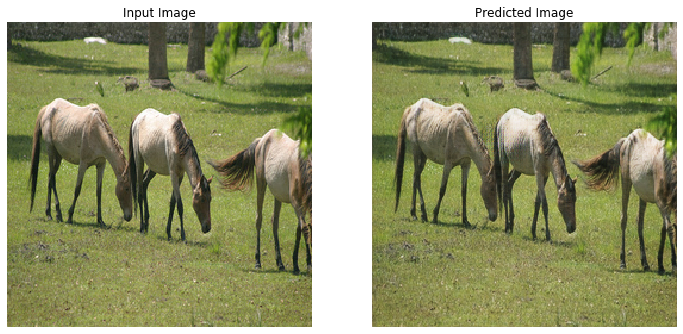

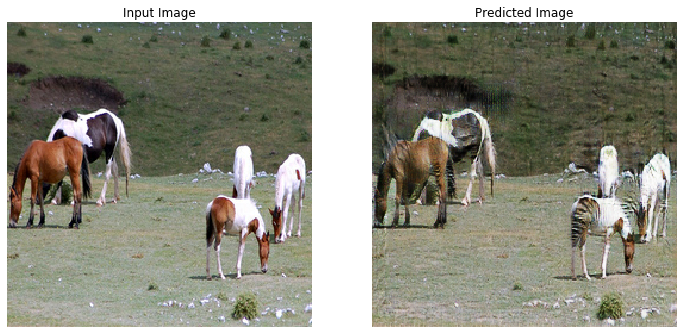

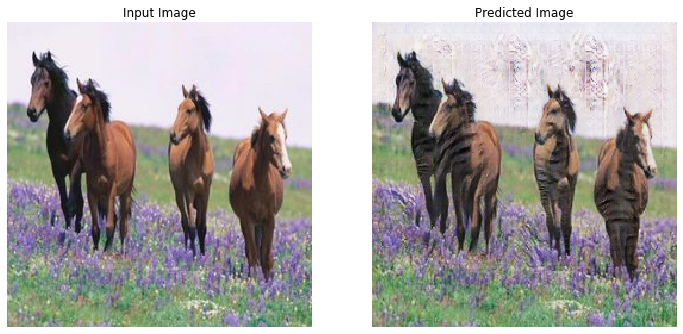

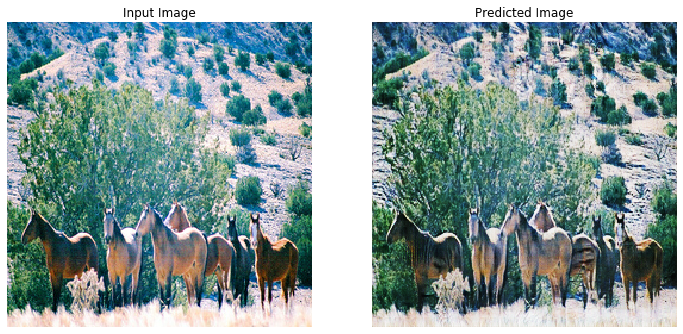

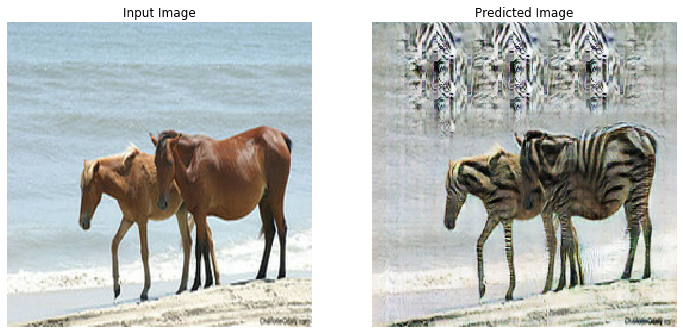

In [13]:
# Run the trained model on the test dataset
for inp in test_horses.take(5):
    generate_images(generator_g, inp)